# Visualizing the Effects of Hyperparameter Values

You want to understand how the performance of a model changes as the value of some hyperparameter changes.

When we have a small number of trees , both training and cross validation score are low, suggesting themodel is underfitted.

As the number of trees increasese to 250 the accuracy of both levels off, suggesting there is probably no much value in the computational cost training a massive forest.

### Plotting Validation Curve

In [20]:
# Load Libraries 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [21]:
# Load data

digits = load_digits()

In [22]:
# Create Feature Matrix and target vector 

features, target = digits.data , digits.target

In [23]:
# Create range of values for parameter 

param_range = np.arange(1,250,2) # start - end - incresing by,

In [24]:
# Calculate accuracy on training and test set using range of parameter values 

train_scores, test_scores = validation_curve(RandomForestClassifier(),     # Classifier
                                             features,                     # Features Matrix
                                             target,                       # Target Vector
                                             param_name = "n_estimators",  # Hyperparameter to examine and vary
                                             param_range = param_range,    # Range of hyperparameter's values to use
                                             cv = 3,                       # Number of folds
                                             scoring = "accuracy",         # Performance metric to judge the model
                                             n_jobs = -1)                  # Use all computer cores

In [25]:
# Calculate mean and standard deviation for training set scores

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

In [26]:
# Calculate mean and standard deviation for test set scores

test_mean = np.mean(test_scores, axis = 1)
test_std  = np.std(test_scores, axis = 1)

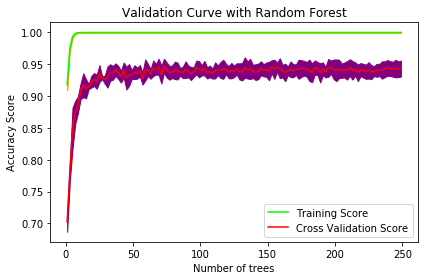

In [27]:
# Plot mean Accuracy ascores for training and test sets

plt.plot(param_range, train_mean, label = "Training Score", color = "lime")
plt.plot(param_range, test_mean, label = "Cross Validation Score", color = "red")

# Plot accuracy brands for training and test sets

plt.fill_between(param_range, train_mean - train_std,
                train_mean + train_std, color = "orange")

plt.fill_between(param_range, test_mean - test_std,
                test_mean + test_std, color = "purple")

# Create Plot

plt.title("Validation Curve with Random Forest")
plt.xlabel("Number of trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()